<a href="https://colab.research.google.com/github/dpyburn89/Pre_modeling/blob/main/Predictive_Modeling_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modeling - Week 3
## Lecture Examples

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Predictive Modeling/cars2010.csv')
data.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.shape

(1107, 14)

In [ ]:
data['DriveDesc']

0       TwoWheelDriveRear
1       TwoWheelDriveRear
2           AllWheelDrive
3           AllWheelDrive
4           AllWheelDrive
              ...        
1102        AllWheelDrive
1103        AllWheelDrive
1104        AllWheelDrive
1105        AllWheelDrive
1106        AllWheelDrive
Name: DriveDesc, Length: 1107, dtype: object

In [ ]:
data['DriveDesc'].value_counts()

TwoWheelDriveFront        382
TwoWheelDriveRear         350
AllWheelDrive             205
FourWheelDrive            159
ParttimeFourWheelDrive     11
Name: DriveDesc, dtype: int64

In [ ]:
levels = pd.factorize(data['DriveDesc'])
levels
# Here we're giving a numeric value to the categorical variables. Levels now has two parts, one is the array of integers, the other is the name


(array([0, 0, 1, ..., 1, 1, 1]),
 Index(['TwoWheelDriveRear', 'AllWheelDrive', 'TwoWheelDriveFront',
        'FourWheelDrive', 'ParttimeFourWheelDrive'],
       dtype='object'))

In [ ]:
#levels[0]
#levels[1]
levels[1].tolist() # Here we converted to a list just because it's easier to see/understand

['TwoWheelDriveRear',
 'AllWheelDrive',
 'TwoWheelDriveFront',
 'FourWheelDrive',
 'ParttimeFourWheelDrive']

In [ ]:
data['DriveDesc_Factor'] = pd.factorize(data['DriveDesc'])[0] # we're factorizing and taking out the array of indexes and creating a new column

In [ ]:
data.loc[:,['DriveDesc', 'DriveDesc_Factor']] # Here we're able to visualize the encoding

,DriveDesc,DriveDesc_Factor
0,TwoWheelDriveRear,0
1,TwoWheelDriveRear,0
2,AllWheelDrive,1
3,AllWheelDrive,1
4,AllWheelDrive,1
...,...,...
1102,AllWheelDrive,1
1103,AllWheelDrive,1
1104,AllWheelDrive,1
1105,AllWheelDrive,1


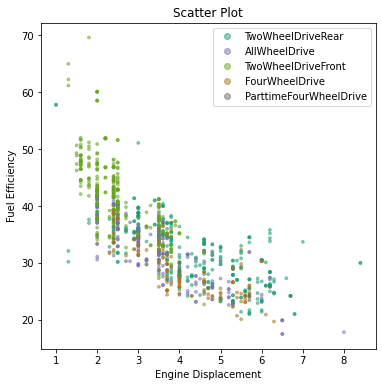

In [ ]:
import matplotlib.pyplot as plt

# Example scatter plot with multiple categories
plt.figure(figsize=(6,6))
levels=pd.factorize(data['DriveDesc'])
scatter = plt.scatter(data['EngDispl'], data['FE'], s=8, alpha=0.5,
                      c=levels[0], cmap='Dark2')
plt.xlabel('Engine Displacement')
plt.ylabel('Fuel Efficiency')
plt.title('Scatter Plot')
plt.legend(handles=scatter.legend_elements()[0], labels=levels[1].tolist()) # This is the list we created above

In [ ]:
data = pd.concat([data, pd.get_dummies(data['DriveDesc'])], axis=1) # here we're using get dummmies, this is what returns 5 columns and each column is a vector of 0s
# and ones. The 1 will be on the row where the column and row description match, values will only have 0 or 1

# There is also a similar function in SCIKITLEARN known as onehotencoding()

In [ ]:
data.loc[[0, 2, 77, 91, 714], ['DriveDesc', 'DriveDesc_Factor', 'AllWheelDrive', 'FourWheelDrive',
       'ParttimeFourWheelDrive', 'TwoWheelDriveFront', 'TwoWheelDriveRear']]

,DriveDesc,DriveDesc_Factor,AllWheelDrive,FourWheelDrive,ParttimeFourWheelDrive,TwoWheelDriveFront,TwoWheelDriveRear
0,TwoWheelDriveRear,0,0,0,0,0,1
2,AllWheelDrive,1,1,0,0,0,0
77,TwoWheelDriveFront,2,0,0,0,1,0
91,FourWheelDrive,3,0,1,0,0,0
714,ParttimeFourWheelDrive,4,0,0,1,0,0


In [ ]:
# Recall a regression model we developed last week
import statsmodels.api as sm

y = data['FE']
X = pd.get_dummies(data.loc[:, ['EngDispl', 'NumCyl', 'DriveDesc', 'CarlineClassDesc']], drop_first=True)
X = sm.add_constant(X)  # Add intercept term to model
X['EngDisplSqr'] = X['EngDispl']**2 # Add a quadratic term to model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     FE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     186.3
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:55:13   Log-Likelihood:                -2914.5
No. Observations:                1107   AIC:                             5877.
Df Residuals:                    1083   BIC:                             5997.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Let's simplify this and create a regression model for fuel efficiency (FE) as a linear function of 
# Engine Displacement and a binary classification of DriveDesc into only two classes (2WD, 4WD)

data['TwoWheelDrive_Indicator'] = \
[1 if (i == 'TwoWheelDriveFront') | (i == 'TwoWheelDriveRear') else 0 for i in data['DriveDesc']] # this code is saying to encode as 1 if either labels is true, 0 if else

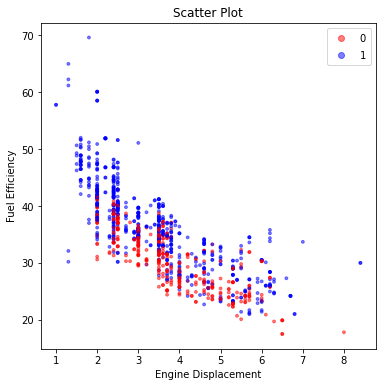

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(6,6))
scatter = plt.scatter(data['EngDispl'], data['FE'], s=8, alpha=0.5,
                      c=data['TwoWheelDrive_Indicator'], cmap=ListedColormap(['r','b']))
plt.xlabel('Engine Displacement')
plt.ylabel('Fuel Efficiency')
plt.title('Scatter Plot')
plt.legend(*scatter.legend_elements())
# It's only two colors because we're using the twowheel drive indicator that we created earlier
# Here the blue points are sitting above the red points, which is a pattern we're looking for, color separation. 

In [ ]:
import statsmodels.api as sm

y = data['FE']
X = data.loc[:, ['EngDispl', 'TwoWheelDrive_Indicator']]
X = sm.add_constant(X)  # Add intercept term to model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print("Fuel Efficiency = {:.6f} + {:.6f}(Engine Displacement) + {:.6f}(TWD Indicator)".format(results.params[0], results.params[1], results.params[2]))

#The way the chart above is coded, if it's blue (1), the car is described as 2wd. If red, (0), it's 4wd. Shows better efficiency with 2wd v 4wd in chart

                            OLS Regression Results                            
Dep. Variable:                     FE   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1192.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          1.45e-276
Time:                        23:59:56   Log-Likelihood:                -3163.6
No. Observations:                1107   AIC:                             6333.
Df Residuals:                    1104   BIC:                             6348.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


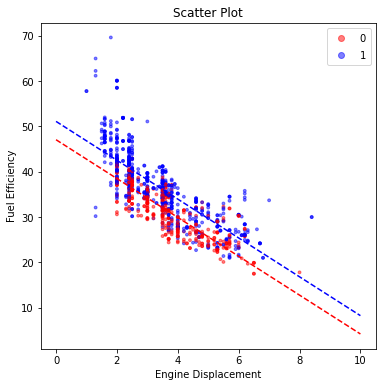

In [ ]:
import numpy as np

plt.figure(figsize=(6,6))
scatter = plt.scatter(data['EngDispl'], data['FE'], s=8, alpha=0.5,
                      c=data['TwoWheelDrive_Indicator'], cmap=ListedColormap(['r','b']))
plt.xlabel('Engine Displacement')
plt.ylabel('Fuel Efficiency')
plt.title('Scatter Plot')
plt.legend(*scatter.legend_elements())

# add linear regression lines to scatterplot 
xseq = np.linspace(0, 10, num=100)
plt.plot(xseq, results.params[1]*xseq+results.params[0], ls='dashed', c='r')
xseq = np.linspace(0, 10, num=100)
plt.plot(xseq, results.params[1]*xseq+results.params[0]+results.params[2], ls='dashed', c='b')
# Here we're fitting two regression lines, one for 2WD and another for 4WD. This is because if the car is 4WD the indicator is 0, the term is removed from the equation
# Here we're just visualizing the regression line, you can see when indicator is 1 (2WD), fuel efficiency is greater

In [ ]:
#print(y)
print(X)
#print(results.params)
#print(results.rsquared)

In [ ]:
# Last week we accounted for curvature in the graph by adding a quadratic term.
# This week, let's use the log transformation
data['LogEngDispl'] = np.log(data['EngDispl']) # We're creating the log value of engine displacement and adding the column to the data

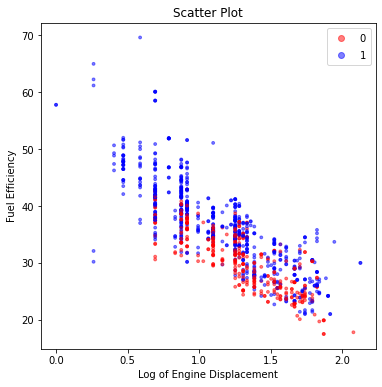

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(6,6))
scatter = plt.scatter(data['LogEngDispl'], data['FE'], s=8, alpha=0.5,
                      c=data['TwoWheelDrive_Indicator'], cmap=ListedColormap(['r','b']))
plt.xlabel('Log of Engine Displacement')
plt.ylabel('Fuel Efficiency')
plt.title('Scatter Plot')
plt.legend(*scatter.legend_elements())

In [ ]:
import statsmodels.api as sm

y = data['FE']
X = data.loc[:, ['LogEngDispl', 'TwoWheelDrive_Indicator']]
X = sm.add_constant(X)  # Add intercept term to model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print("Fuel Efficiency = {:.6f} + {:.6f}(Engine Displacement) + {:.6f}(TWD Indicator)".format(results.params[0], results.params[1], results.params[2]))
# our r squared value has increased, showing that this model explaines the variance in FE better

                            OLS Regression Results                            
Dep. Variable:                     FE   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1441.
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          1.76e-308
Time:                        00:09:47   Log-Likelihood:                -3089.9
No. Observations:                1107   AIC:                             6186.
Df Residuals:                    1104   BIC:                             6201.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


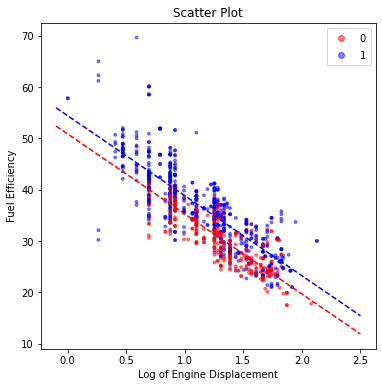

In [ ]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(data['LogEngDispl'], data['FE'], s=8, alpha=0.5,
                      c=data['TwoWheelDrive_Indicator'], cmap=ListedColormap(['r','b']))
plt.xlabel('Log of Engine Displacement')
plt.ylabel('Fuel Efficiency')
plt.title('Scatter Plot')
plt.legend(*scatter.legend_elements())

# add linear regression lines to scatterplot 
xseq = np.linspace(-0.1, 2.5, num=100)
plt.plot(xseq, results.params[1]*xseq+results.params[0], ls='dashed', c='r')
plt.plot(xseq, results.params[1]*xseq+results.params[0]+results.params[2], ls='dashed', c='b')

In [ ]:
y = data['FE']
X = data.loc[:, ['LogEngDispl', 'AllWheelDrive', 'FourWheelDrive',
       'ParttimeFourWheelDrive', 'TwoWheelDriveFront', 'TwoWheelDriveRear']]
X = sm.add_constant(X)  # Add intercept term to model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# In note two, it's telling us there may be multicollinearity

                            OLS Regression Results                            
Dep. Variable:                     FE   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     624.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.38e-318
Time:                        00:11:54   Log-Likelihood:                -3056.4
No. Observations:                1107   AIC:                             6125.
Df Residuals:                    1101   BIC:                             6155.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     41

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X
# Here we're inspecting the data. columns of 1ns for onstant, log of engine displacement, and drive variables. We did not drop the first of the matrix in
# drive descriptions. Adding up the drive indicator columns will be equal to the constant term. If one column is a perfect sum of other columns in your design matrix, it
# causes multicollinearity, and regression parameters are unreliable

,const,LogEngDispl,AllWheelDrive,FourWheelDrive,ParttimeFourWheelDrive,TwoWheelDriveFront,TwoWheelDriveRear
0,1.0,1.547563,0,0,0,0,1
1,1.0,1.547563,0,0,0,0,1
2,1.0,1.435085,1,0,0,0,0
3,1.0,1.435085,1,0,0,0,0
4,1.0,1.648659,1,0,0,0,0
...,...,...,...,...,...,...,...
1102,1.0,1.163151,1,0,0,0,0
1103,1.0,1.098612,1,0,0,0,0
1104,1.0,1.163151,1,0,0,0,0
1105,1.0,1.163151,1,0,0,0,0


In [ ]:
y = data['FE']
X = data.loc[:, ['LogEngDispl', 'FourWheelDrive', 'ParttimeFourWheelDrive', 'TwoWheelDriveFront', 'TwoWheelDriveRear']]
X = sm.add_constant(X)  # Add intercept term to model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
# Here, we're removing the first column to remove the colinneariy because some rows will add up to 0 and not equal the constant term

                            OLS Regression Results                            
Dep. Variable:                     FE   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     624.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.38e-318
Time:                        00:19:52   Log-Likelihood:                -3056.4
No. Observations:                1107   AIC:                             6125.
Df Residuals:                    1101   BIC:                             6155.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     48

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Let's start over now and talk about how preprocessing steps can be done using scikit learn

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Predictive Modeling/cars2010.csv')
data.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#ohe_transformer = OneHotEncoder()
ohe_transformer = OneHotEncoder(sparse=False) # sparse parameter = false initilizes the onehotencoder
print(ohe_transformer.fit_transform(data.loc[:,['DriveDesc']])) # this is just the drive desciption column from dataframe and creates the 0s ans 1s
# Here the FIT is determining the levels, if 1 or 0, and transform applies those rules and creates the actual columns

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
ohe_transformer.get_feature_names_out() #Here we're just checking to see what the feature names are. With sklearn we're not as worried about interpreting model, just predicted values

array(['DriveDesc_AllWheelDrive', 'DriveDesc_FourWheelDrive',
       'DriveDesc_ParttimeFourWheelDrive', 'DriveDesc_TwoWheelDriveFront',
       'DriveDesc_TwoWheelDriveRear'], dtype=object)

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log) # the np.log is us telling us to do a log transformation, we can put other functions here if needed
print(log_transformer.fit_transform(data.loc[:,['EngDispl']])) # Here we're transforming the engine disp column with the log value

      EngDispl
0     1.547563
1     1.547563
2     1.435085
3     1.435085
4     1.648659
...        ...
1102  1.163151
1103  1.098612
1104  1.163151
1105  1.163151
1106  1.481605

[1107 rows x 1 columns]


In [ ]:
#log_transformer.get_feature_names_out() ##-- this code doesn't come out
data['EngDispl']


0       4.7
1       4.7
2       4.2
3       4.2
4       5.2
       ... 
1102    3.2
1103    3.0
1104    3.2
1105    3.2
1106    4.4
Name: EngDispl, Length: 1107, dtype: float64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

ct = ColumnTransformer(
    [("log", FunctionTransformer(np.log), ['EngDispl']), # Were just naming the transofrmation LOG
     ("onehot", OneHotEncoder(sparse=False), ['DriveDesc']) # Using the onehotencoder on drive desc
    ]
)

#X_train = data.loc[:, ['EngDispl', 'DriveDesc']]
X_train = data.copy().drop(columns=['FE']) # This row was subbed in to include much more data, want to see what happens to data not in column transformation
X_train_trans = ct.fit_transform(X_train) # We're transforming the data
display(X_train_trans)
# The result was still the same, all returned was the matrix and log of engine disp, only data in ct

array([[1.54756251, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.54756251, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.43508453, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [1.16315081, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.16315081, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.48160454, 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.compose import make_column_transformer # The only difference here compared to the one above is syntax and don't need names, not very different

ct = make_column_transformer(
    (FunctionTransformer(np.log), ['EngDispl']), # difference with above is this doesn't have 'log
    (OneHotEncoder(sparse=False), ['DriveDesc']) # this doesn't have 'onehot'
)

X_train = data.loc[:, ['EngDispl', 'DriveDesc']]
X_train_trans = ct.fit_transform(X_train)
display(X_train_trans)

array([[1.54756251, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.54756251, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.43508453, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [1.16315081, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.16315081, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.48160454, 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [ ]:
ct = make_column_transformer(
    (FunctionTransformer(np.log), ['EngDispl']), # difference with above is this doesn't have 'log
    (OneHotEncoder(sparse=False), ['DriveDesc']) # this doesn't have 'onehot'
)

X_train = data.loc[:, ['EngDispl', 'DriveDesc']]
X_train_trans = ct.fit_transform(X_train)
display(X_train_trans)

array([[1.54756251, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.54756251, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.43508453, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [1.16315081, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.16315081, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.48160454, 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn import linear_model
from sklearn.compose import make_column_transformer

y_train = data['FE']
X_train = data.loc[:, ['EngDispl', 'DriveDesc']]

ct = make_column_transformer(
    (FunctionTransformer(np.log), ['EngDispl']),
    (OneHotEncoder(sparse=False), ['DriveDesc'])
)

X_train_trans = ct.fit_transform(X_train)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_trans, y_train)

regr.score(X_train_trans, y_train) # the score is equal to the statsmodel r squared value, it should be

0.7392918433566256

In [ ]:
#regr.intercept_
#regr.coef_
#regr.feature_names_in_

In [ ]:
# Let's compare this result to output from statsmodels
import statsmodels.api as sm

y = data['FE']
X = pd.get_dummies(data.loc[:, ['DriveDesc']], drop_first=True)
X['LogEngDisplSqr'] = np.log(data['EngDispl'])
X = sm.add_constant(X)  # Add intercept term to model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     FE   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     624.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.38e-318
Time:                        01:24:53   Log-Likelihood:                -3056.4
No. Observations:                1107   AIC:                             6125.
Df Residuals:                    1101   BIC:                             6155.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Let's test the model on new, never-before-seen data

import pandas as pd

new_data = pd.read_csv('/content/drive/MyDrive/Predictive Modeling/cars2011.csv')
y_test = new_data['FE']
X_test = new_data.loc[:, ['EngDispl', 'DriveDesc']]

X_test_trans = ct.transform(X_test)
regr.score(X_test_trans, y_test)
# The score is .76, so the r squared value is similar between two. We don't need to do CT again, we're using it on x_test

0.7677466071213374

In [ ]:
X_train_trans[:, [0, 2, 3, 4, 5]] # Here we're dropping the first column because we know for classical stats methods there was multicollienarity

array([[1.54756251, 0.        , 0.        , 0.        , 1.        ],
       [1.54756251, 0.        , 0.        , 0.        , 1.        ],
       [1.43508453, 0.        , 0.        , 0.        , 0.        ],
       ...,
       [1.16315081, 0.        , 0.        , 0.        , 0.        ],
       [1.16315081, 0.        , 0.        , 0.        , 0.        ],
       [1.48160454, 0.        , 0.        , 0.        , 0.        ]])

In [ ]:
# Retrain the model omitting the first one-hot-encoded column
regr.fit(X_train_trans[:, [0, 2, 3, 4, 5]], y_train)

regr.score(X_train_trans[:, [0, 2, 3, 4, 5]], y_train) # the score is still the same, so the effect of collinearity just mean that coefficients were off

0.739301841087258

In [ ]:
print(regr.intercept_, regr.coef_)

48.674132417641275 [-13.76616025  -0.30364312  -1.67101599   5.01472931   2.17588912]


In [ ]:
# Restest the model on new data

regr.score(X_test_trans[:, [0, 2, 3, 4, 5]], y_test) # It does make a slight difference with the new data

0.7680011172005186

In [ ]:
# Let's start over and use Logistic Regression to classify vehicles as Two-Wheel drive using Fuel Efficiency
# as a predictor variable

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Predictive Modeling/cars2010.csv')

data['TwoWheelDrive_Indicator'] = \
[1 if (i == 'TwoWheelDriveFront') | (i == 'TwoWheelDriveRear') else 0 for i in data['DriveDesc']]

data.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift,TwoWheelDrive_Indicator
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0,1
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0,1
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0,0


Text(0.5, 1.0, 'Scatter Plot')

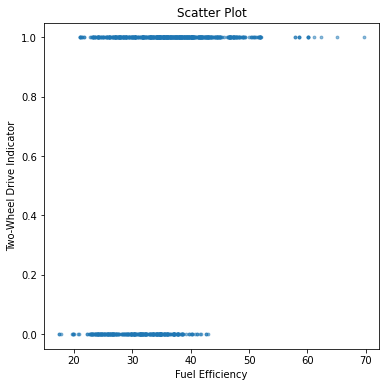

In [ ]:
# Make a scatter plot

plt.figure(figsize=(6,6))
plt.scatter(data['FE'], data['TwoWheelDrive_Indicator'], s=8, alpha=0.5)
plt.xlabel('Fuel Efficiency')
plt.ylabel('Two-Wheel Drive Indicator')
plt.title('Scatter Plot')
# This scatterplot is showing us 2 wheel drive or not, a binary classification. 1 is 2wd, 0 is not.

In [ ]:
from sklearn.linear_model import LogisticRegression

y_train = data['TwoWheelDrive_Indicator']
X_train = data.loc[:, ['FE']]

logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_train) # this is giving us the predicted values, y train has actual values
logr.score(X_train, y_train) # score is accuracy - comes to .67

0.6702800361336947

In [ ]:
data['TwoWheelDrive_Indicator'].sum()

732

In [ ]:
data.shape

(1107, 15)

In [ ]:
data['TwoWheelDrive_Indicator'].sum()/data.shape[0] # This is just the ratio, if we always predicted 2WD, we would be almost as accurate as the logreg model
# Our model isn't very good against a baseline

0.6612466124661247

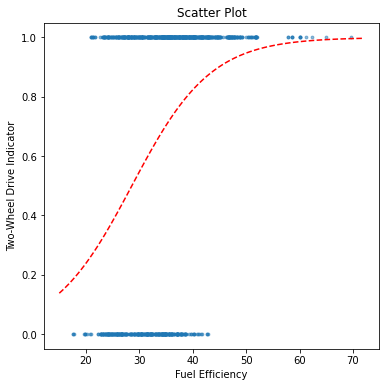

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(data['FE'], data['TwoWheelDrive_Indicator'], s=8, alpha=0.5)
plt.xlabel('Fuel Efficiency')
plt.ylabel('Two-Wheel Drive Indicator')
plt.title('Scatter Plot')

# add probability curve to scatterplot 
xseq = np.linspace(15, 72, num=100)
y_prob = logr.predict_proba(pd.DataFrame({'FE':xseq}))
plt.plot(xseq, [i[1] for i in y_prob], ls='dashed', c='r')

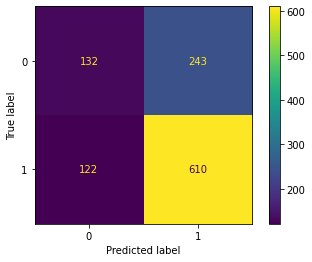

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# This is another way to judge success, we want to see where the errors of our model occur
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred))
disp.plot()
# we want to see lots of data on the diagonal, our highest volume is in lower right. We predicted 2WD 243 times when it was 4WD

In [ ]:
from sklearn.compose import make_column_transformer

y_train = data['TwoWheelDrive_Indicator']
X_train = data.copy().drop(columns=['TwoWheelDrive_Indicator'])

# Let's try again with more predictor variables
ct = make_column_transformer(
    ('passthrough', ['FE']), # FE will be a predictor, as well as many others, we're onehotencoding the carline descrip
    (OneHotEncoder(sparse=False), ['CarlineClassDesc'])
)
# The column transformer is choosing variables and transforming them
X_train_trans = ct.fit_transform(X_train)

logr = LogisticRegression(max_iter=500) # Prof ran without max_iter and it popped an error, default is 100 iters

logr.fit(X_train_trans, y_train)
y_pred = logr.predict(X_train_trans)
logr.score(X_train_trans, y_train)

0.8491418247515808

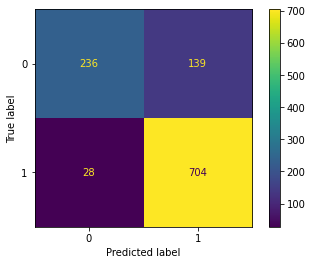

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred))
disp.plot()
# This looks much better

In [ ]:
# Test the model on new data

import pandas as pd

new_data = pd.read_csv('/content/drive/MyDrive/Predictive Modeling/cars2011.csv')

new_data['TwoWheelDrive_Indicator'] = \
[1 if (i == 'TwoWheelDriveFront') | (i == 'TwoWheelDriveRear') else 0 for i in new_data['DriveDesc']]

y_test = new_data['TwoWheelDrive_Indicator']
X_test = new_data.copy().drop(columns=['TwoWheelDrive_Indicator'])

X_test_trans = ct.transform(X_test) # we don't need to fit column transformer since it was done previously with the training data

logr.score(X_test_trans, y_test) # We're testing on the new data to see how the model generalizes. We're pretty much repeating previous steps
# score isn't as good, the model didn't generalize as well and we're likely overfitting

0.7673469387755102

In [ ]:
# Next, let's try a multi-category classification model
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

y_train = data['DriveDesc'] # we are also changing the response variable, it's more in depth than the 2wd indicator
X_train = data.copy().drop(columns=['DriveDesc'])

# Let's try again with more predictor variables
ct = make_column_transformer(
    (StandardScaler(), ['FE']), # We're adding in the fuel efficiency data
    (OneHotEncoder(sparse=False), ['CarlineClassDesc'])
)

X_train_trans = ct.fit_transform(X_train)

logr = LogisticRegression(max_iter=500)

logr.fit(X_train_trans, y_train)
y_pred = logr.predict(X_train_trans)
logr.score(X_train_trans, y_train)
# we only classified about 73 percent of the time, could be because model is more complex, we have 5 classes

0.7353206865401988

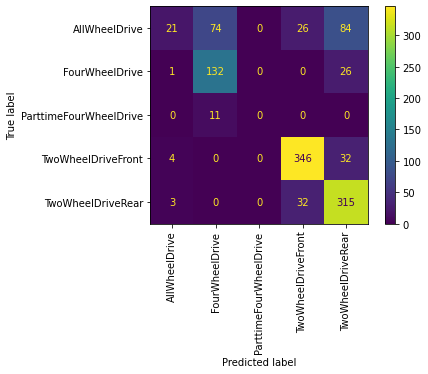

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred), display_labels=logr.classes_)
disp.plot(xticks_rotation=90)
# Brightest colors on the diagonal, which is a good result

In [ ]:
data['DriveDesc'].value_counts()

TwoWheelDriveFront        382
TwoWheelDriveRear         350
AllWheelDrive             205
FourWheelDrive            159
ParttimeFourWheelDrive     11
Name: DriveDesc, dtype: int64

In [ ]:
# Test on new data

y_test = new_data['DriveDesc']
X_test = new_data.loc[:, ['FE', 'CarlineClassDesc']]

X_test_trans = ct.transform(X_test)

logr.score(X_test_trans, y_test)
# The score on new data is almost as good as training, the model generalized well

0.7387755102040816

## Student Practice Exercises

In [ ]:
# 1

# Use pandas function read_csv to load data from the file 'fabricatedLoanData.csv' into a dataframe named 'data'.
# The file can be downloaded from the Week 1 module in Brightspace. Data definitions are provided in the file 
# named LCDataDictionary.xlsx

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Predictive Modeling/fabricatedLoanData.csv')

# Use the value_counts function to display distinct values of the term column along with their frequncies in 
# the data set



data['term'].value_counts()

36 months    119377
60 months     58164
Name: term, dtype: int64

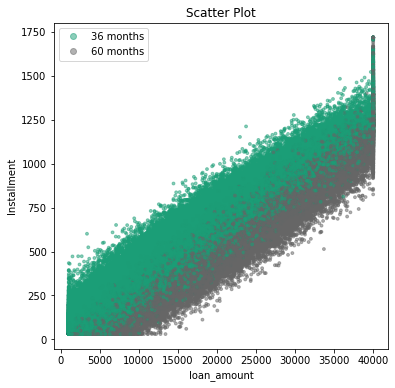

In [ ]:
# 2

# Create a scatter plot of installment versus loan_amnt with points shown in different
# colors, each color corresponding to a particular value of the term column, do not need to transform to int this time
levels = pd.factorize(data['term'])
levels
levels[1].tolist()

import matplotlib.pyplot as plt

# Example scatter plot with multiple categories
plt.figure(figsize=(6,6))
levels=pd.factorize(data['term'])
scatter = plt.scatter(data['loan_amnt'], data['installment'], s=8, alpha=0.5,
                      c=levels[0], cmap='Dark2')
plt.xlabel('loan_amount')
plt.ylabel('Installment')
plt.title('Scatter Plot')
plt.legend(handles=scatter.legend_elements()[0], labels=levels[1].tolist())

In [ ]:
# 3

# Using pd.get_dummies and sm.OLS, print the summary of a regression analysis for 
# installment as a linear function of loan_amount and term.

import statsmodels.api as sm

y = data['installment']
X = pd.get_dummies(data.loc[:, ['loan_amnt', 'term']], drop_first=True)
X = sm.add_constant(X)  # Add intercept term to model
#X['EngDisplSqr'] = X['EngDispl']**2 # Add a quadratic term to model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            installment   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 8.963e+05
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:23:15   Log-Likelihood:            -1.0481e+06
No. Observations:              177541   AIC:                         2.096e+06
Df Residuals:                  177538   BIC:                         2.096e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             37.4739      0.480     78.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# 4

# Using pd.get_dummies and sm.OLS, print the summary of a regression analysis for 
# installment as a linear function of loan_amount, int_rate and term.

y = data['installment']
X = pd.get_dummies(data.loc[:, ['loan_amnt', 'term', 'int_rate']], drop_first=True)
X = sm.add_constant(X)  # Add intercept term to model
#X['EngDisplSqr'] = X['EngDispl']**2 # Add a quadratic term to model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            installment   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 7.211e+05
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:25:02   Log-Likelihood:            -1.0328e+06
No. Observations:              177541   AIC:                         2.066e+06
Df Residuals:                  177537   BIC:                         2.066e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -52.2993      0.659    -79.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# 5

# Using pd.get_dummies and sm.OLS, print the summary of a regression analysis for 
# installment as a linear function of loan_amount, int_rate, purpose and term.

y = data['installment']
X = pd.get_dummies(data.loc[:, ['loan_amnt', 'term', 'int_rate', 'purpose']], drop_first=True)
X = sm.add_constant(X)  # Add intercept term to model
#X['EngDisplSqr'] = X['EngDispl']**2 # Add a quadratic term to model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:            installment   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.803e+05
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:26:16   Log-Likelihood:            -1.0328e+06
No. Observations:              177541   AIC:                         2.066e+06
Df Residuals:                  177528   BIC:                         2.066e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
# 6

# Run the following code to prepare data for regression models in scikit-learn by dividing 
# it into train and test data sets.

from sklearn.model_selection import train_test_split
y = data['installment']
X = data.copy().drop(columns=['installment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Next, complete the code below to pass through the variables loan_amnt and int_rate and
# transform term and purpose into one-hot-encoded variables. The resulting date set, 
# X_train_trans will be used to train a regression model for installment as a function 
# of loan_amount, int_rate, purpose and term using sklearn.

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

ct = make_column_transformer(
    ('passthrough', ['loan_amnt', 'int_rate']),
    (OneHotEncoder(sparse=False), ['term', 'purpose'])
)
X_train_trans = ct.fit_transform(X_train)

In [ ]:
# 7

# Fit a regression model for installment as a function of loan_amount, int_rate, purpose and term.
# Print the r-square score resulting from your fit to the transformed training data set

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train_trans, y_train)
regr.score(X_train_trans, y_train)

0.9240117080764182

In [ ]:
# 8

# Test your model using X_test and y_test data sets created above via train_test_split
# Pass X_test through the column transformer to create X_test_trans,
# then calcualate the test score 
X_test_trans = ct.fit_transform(X_test)
regr = linear_model.LinearRegression()
regr.fit(X_test_trans, y_test)
regr.score(X_test_trans, y_test)

0.9246295995933047

In [ ]:
# 9

# Use the value_counts function to display distinct values of the loan_status column along with their frequncies in 
# the data set

data['loan_status'].value_counts()

Current               73761
Late (31-120 days)    51271
Late (16-30 days)     29317
Fully Paid            13239
In Grace Period        6994
Charged Off            2356
Default                 603
Name: loan_status, dtype: int64

In [ ]:
# 10

# Write code below to populate lists called str_vars_nmv and num_vars_nmv.
# The list str_vars_nmv should contain a list of column names in data which 
# are string variables (dtype = 'object'), excluding the variables loan_status,
# issue_d, last_credit_pull_d and earliest_cr_line (which contain date strings),
# which have no missing values. The list num_vars_nmv should contain a list of 
# column names in data which are numeric and have no missing values.
# These will be used in a logistic regression model to predict loan_status

# Initialize
str_vars_nmv = [] # String variables with no missing values, excluding loan_status and date strings
num_vars_nmv = [] # Numeric variables with no missing values

# Loop through data.columns and append the column to the apprpriate str_vars_nmv or num_vars_nmv
# if the conditions are met
for col, typ in data.dtypes.items():
  if col not in ('loan_status', 'issue_d', 'last_credit_pull_d', 'earliest_cr_line') and typ == 'object' and not data[col].isna().values.any():
    str_vars_nmv.append(col)
  elif typ in ('int64', 'float64') and not data[col].isna().values.any():
    num_vars_nmv.append(col)
    

In [ ]:
# 11

# Run the following code to prepare data for a logistic regression model in scikit-learn 
# by dividing it into train and test data sets. The reponse variable we will be predicting
# is loan_status

from sklearn.model_selection import train_test_split
y = data['loan_status']
X = data.copy().drop(columns=['loan_status'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Next, complete the code below to pass all variables through a column transformer
# to build predictor variables for the logistic regression model. Numeric variables
# with no missing values (stored in the list num_vars_nmv) should be passed through
# the standard scaler transformation. String variables with no missing values (stored 
# in the list str_vars_nmv) should be passsed through the one-hot-encoder transformer.
# All remaining variables (those containing missing values) should be dropped.

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

ct = make_column_transformer(
  (StandardScaler(), num_vars_nmv),
  (OneHotEncoder(sparse=False), str_vars_nmv),
  remainder='drop'
)

X_train_trans = ct.fit_transform(X_train)


In [ ]:
# 12

# Fit a logistic regression model for loan_status as a function of all predictors stored
# X_train_trans

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=400)

model.fit(X_train_trans, y_train)


In [ ]:
# 13

# Calculate predicted values of loan_status from the variables in X_train_trans and
# display the confusion matrix calculated from the training data

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
prediction = model.predict(X_train_trans)
cm = confusion_matrix(y_train, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation='vertical')



In [ ]:
# 14

# Test your logistic regression model using data in X_test and y_test
# Pass X_test through the column transformer to create X_test_trans,
# then calcualate the test score 

X_test_trans = ct.transform(X_test)

score = model.score(X_test_trans, y_test)

print(score)


In [ ]:
# 15

# Calculate predicted values of loan_status from the variables in X_test_trans and
# display the confusion matrix calculated from the test data
prediction = model.predict(X_test_trans)
cm = confusion_matrix(y_test, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation='vertical'

